In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [2]:
# Loading the cleaned df from previuos notebook:

mta_df_clean = pd.read_csv('mta_df_clean_noline.csv')

In [3]:
# Removing the old index column:

mta_df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
mta_df_clean.head()

,TURNSTILE,STATION,DATE_TIME,DATE,TIME,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,T_INTERVAL,ENTRIES_RATE,EXITS_RATE
0,A002/R051/02-00-00,59 ST,2021-06-05 00:00:00,06/05/2021,00:00:00,7581941,2591624,0.0,0.0,NaN,NaN,NaN
1,A002/R051/02-00-00,59 ST,2021-06-05 04:00:00,06/05/2021,04:00:00,7581950,2591625,9.0,1.0,14400.0,0.000625,0.000069
2,A002/R051/02-00-00,59 ST,2021-06-05 08:00:00,06/05/2021,08:00:00,7581954,2591635,4.0,10.0,14400.0,0.000278,0.000694
3,A002/R051/02-00-00,59 ST,2021-06-05 12:00:00,06/05/2021,12:00:00,7582009,2591655,55.0,20.0,14400.0,0.003819,0.001389
4,A002/R051/02-00-00,59 ST,2021-06-05 16:00:00,06/05/2021,16:00:00,7582124,2591683,115.0,28.0,14400.0,0.007986,0.001944


In [5]:
mta_df_clean.describe()

,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,T_INTERVAL,ENTRIES_RATE,EXITS_RATE
count,2.722708e+06,2.722708e+06,2.584025e+06,2.577205e+06,2.717678e+06,2.579266e+06,2.572450e+06
mean,4.161933e+07,3.326199e+07,6.403738e+01,7.443583e+01,1.444698e+04,4.452758e-03,5.169026e-03
std,2.183449e+08,1.918266e+08,1.232193e+02,1.860142e+02,5.719439e+03,6.087114e-03,7.749011e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.184580e+05,1.006758e+05,6.000000e+00,8.000000e+00,1.440000e+04,4.166667e-04,5.555556e-04
50%,1.403842e+06,8.550550e+05,3.100000e+01,3.400000e+01,1.440000e+04,2.152778e-03,2.361111e-03
75%,6.016518e+06,3.970630e+06,8.800000e+01,9.500000e+01,1.440000e+04,6.180556e-03,6.597222e-03
max,2.147415e+09,2.133797e+09,6.955400e+04,1.230080e+05,4.162999e+06,3.284673e-01,4.441800e-01


In [6]:
# Calculating the daily number of entries for each station:

station_daily_entries = mta_df_clean.groupby(["STATION", "DATE"])[['ENTRIES_DIFF', 'EXITS_DIFF']].sum().reset_index()

In [7]:
station_daily_entries['TOTAL_TRAFFIC'] = station_daily_entries['ENTRIES_DIFF'] + station_daily_entries['EXITS_DIFF']

In [8]:
station_daily_entries.head()

,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,1 AV,06/05/2021,5612.0,9989.0,15601.0
1,1 AV,06/06/2021,5863.0,10751.0,16614.0
2,1 AV,06/07/2021,7479.0,12810.0,20289.0
3,1 AV,06/08/2021,7661.0,13140.0,20801.0
4,1 AV,06/09/2021,7901.0,13274.0,21175.0


In [9]:
# Calculating the total number of entries for each station during the 13 weeks:

station_total = mta_df_clean.groupby(["STATION"])[['ENTRIES_DIFF', 'EXITS_DIFF']].sum().reset_index()
station_total['TOTAL_TRAFFIC'] = station_total['ENTRIES_DIFF'] + station_total['EXITS_DIFF']
station_total.head()

,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,1 AV,672580.0,1216162.0,1888742.0
1,103 ST,946734.0,1020636.0,1967370.0
2,103 ST-CORONA,913165.0,984239.0,1897404.0
3,104 ST,155286.0,107379.0,262665.0
4,110 ST,345393.0,462326.0,807719.0


In [10]:
# Finding stations with the most entry number:

station_rank_entry = station_total.sort_values('ENTRIES_DIFF', ascending=False)
station_rank_entry.head(10)

,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
46,23 ST,2602073.0,3038242.0,5640315.0
110,86 ST,2596549.0,3596416.0,6192965.0
14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
9,125 ST,2416886.0,3089945.0,5506831.0
353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
217,FLUSHING-MAIN,2142718.0,2493249.0,4635967.0


In [11]:
# Finding stations with the most exit number:

station_rank_exit = station_total.sort_values('EXITS_DIFF', ascending=False)
station_rank_exit.head(10)

,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
110,86 ST,2596549.0,3596416.0,6192965.0
14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
9,125 ST,2416886.0,3089945.0,5506831.0
46,23 ST,2602073.0,3038242.0,5640315.0
226,FULTON ST,2112001.0,2749735.0,4861736.0


In [12]:
# Finding stations with the most total traffic:

station_rank_total = station_total.sort_values('TOTAL_TRAFFIC', ascending=False)
station_rank_total.head(10)

,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
110,86 ST,2596549.0,3596416.0,6192965.0
68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
46,23 ST,2602073.0,3038242.0,5640315.0
9,125 ST,2416886.0,3089945.0,5506831.0
353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
226,FULTON ST,2112001.0,2749735.0,4861736.0


### Inclusion of three stations (23rd ST, 85th ST and 125 ST) among the top 10, is a bit suspicious . Upon further inspection we found out that the number for these three stations are the lump of all the stations on those streets spreading from east to west of Manhattan. The source of the issue is the naming of the stations in the original CSV datasets from MTA. Therefore we eliminate them for now, anw will address this issue further along the project: 

In [13]:
station_total.drop(station_total[(station_total.STATION == '23 ST') 
                               | (station_total.STATION == '86 ST') 
                               | (station_total.STATION == '125 ST')].index, inplace=True)
                                                        
# Correcting the the total number of entries DF:

station_total.reset_index(inplace=True)

In [14]:
station_rank_entry = station_total.sort_values('ENTRIES_DIFF', ascending=False)
station_rank_exit = station_total.sort_values('EXITS_DIFF', ascending=False)
station_rank_total = station_total.sort_values('TOTAL_TRAFFIC', ascending=False)

In [15]:
# Top 10 stations for total number of entries:

top_ten_entry = station_rank_entry.iloc[0:10].sort_values(by='ENTRIES_DIFF', ascending=False)
top_ten_entry.head(10)

,index,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
59,61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
57,59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
230,233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
66,68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
13,14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
350,353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
214,217,FLUSHING-MAIN,2142718.0,2493249.0,4635967.0
223,226,FULTON ST,2112001.0,2749735.0,4861736.0
83,85,59 ST,1927453.0,2460161.0,4387614.0
254,257,JKSN HT-ROOSVLT,1918403.0,1900163.0,3818566.0


In [16]:
# Top 10 stations for total number of exits:

top_ten_exit = station_rank_exit.iloc[0:10].sort_values(by='EXITS_DIFF', ascending=False)
top_ten_exit.head(10)

,index,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
59,61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
57,59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
230,233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
13,14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
66,68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
350,353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
223,226,FULTON ST,2112001.0,2749735.0,4861736.0
214,217,FLUSHING-MAIN,2142718.0,2493249.0,4635967.0
83,85,59 ST,1927453.0,2460161.0,4387614.0
170,173,CANAL ST,1869434.0,2360997.0,4230431.0


In [17]:
# Top 10 stations for total number of traffic:

top_ten_total = station_rank_total.iloc[0:10].sort_values(by='TOTAL_TRAFFIC', ascending=False)
top_ten_total.head(10)

,index,STATION,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
59,61,34 ST-PENN STA,3970695.0,5383868.0,9354563.0
57,59,34 ST-HERALD SQ,3087374.0,4102623.0,7189997.0
230,233,GRD CNTRL-42 ST,2834456.0,4090554.0,6925010.0
66,68,42 ST-PORT AUTH,2703824.0,3344375.0,6048199.0
13,14,14 ST-UNION SQ,2462893.0,3562956.0,6025849.0
350,353,TIMES SQ-42 ST,2241836.0,3092530.0,5334366.0
223,226,FULTON ST,2112001.0,2749735.0,4861736.0
214,217,FLUSHING-MAIN,2142718.0,2493249.0,4635967.0
83,85,59 ST,1927453.0,2460161.0,4387614.0
170,173,CANAL ST,1869434.0,2360997.0,4230431.0


### And now we plot these top 10 stations for entries, exits and total traffic bar graph:

In [18]:
list(top_ten_entry['STATION'])

['34 ST-PENN STA',
 '34 ST-HERALD SQ',
 'GRD CNTRL-42 ST',
 '42 ST-PORT AUTH',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 'FLUSHING-MAIN',
 'FULTON ST',
 '59 ST',
 'JKSN HT-ROOSVLT']

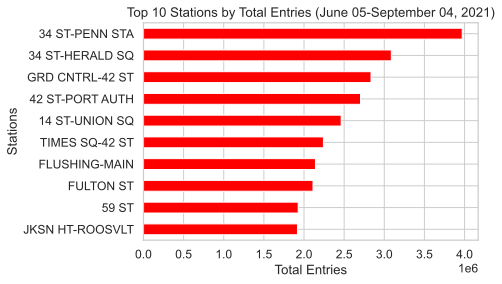

In [19]:
fig, ax = plt.subplots()
(top_ten_entry['ENTRIES_DIFF'].sort_values()).plot(kind='barh', color ='red',ax=ax)
ax.set(title='Top 10 Stations by Total Entries (June 05-September 04, 2021)', xlabel='Total Entries', ylabel='Stations')
ax.set_yticklabels(list(top_ten_entry['STATION'])[::-1])
ax.legend().set_visible(False)
fig.savefig("Top_Ten_Entries.png", bbox_inches='tight', dpi=600)

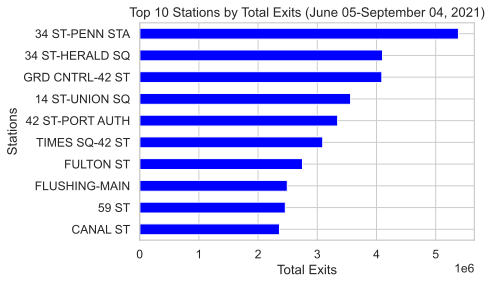

In [20]:
fig, ax = plt.subplots()
(top_ten_exit['EXITS_DIFF'].sort_values()).plot(kind='barh', color ='blue',ax=ax)
ax.set(title='Top 10 Stations by Total Exits (June 05-September 04, 2021)', xlabel='Total Exits', ylabel='Stations')
ax.set_yticklabels(list(top_ten_exit['STATION'])[::-1])
ax.legend().set_visible(False)
fig.savefig("Top_Ten_Exits.png", bbox_inches='tight', dpi=600)

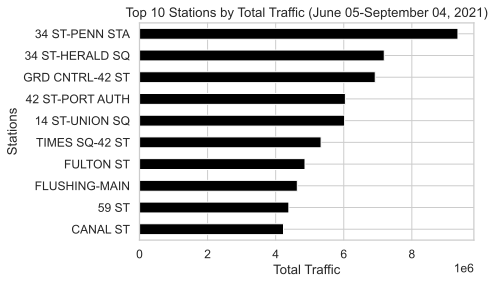

In [21]:
fig, ax = plt.subplots()
(top_ten_total['TOTAL_TRAFFIC'].sort_values()).plot(kind='barh', color ='black',ax=ax)
ax.set(title='Top 10 Stations by Total Traffic (June 05-September 04, 2021)', xlabel='Total Traffic', ylabel='Stations')
ax.set_yticklabels(list(top_ten_total['STATION'])[::-1])
ax.legend().set_visible(False)
fig.savefig("Top_Ten_Total.png", bbox_inches='tight', dpi=600)

### Now we plot the total traffic by day of the week during summer 2021:

In [22]:
station_daily_entries.head()

,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,1 AV,06/05/2021,5612.0,9989.0,15601.0
1,1 AV,06/06/2021,5863.0,10751.0,16614.0
2,1 AV,06/07/2021,7479.0,12810.0,20289.0
3,1 AV,06/08/2021,7661.0,13140.0,20801.0
4,1 AV,06/09/2021,7901.0,13274.0,21175.0


In [23]:
# Finding the day of the week of each rcording:

station_daily_entries['DAY_OF_WEEK'] = pd.to_datetime(station_daily_entries['DATE']).dt.day_name()

In [24]:
station_daily_entries.head()

,STATION,DATE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC,DAY_OF_WEEK
0,1 AV,06/05/2021,5612.0,9989.0,15601.0,Saturday
1,1 AV,06/06/2021,5863.0,10751.0,16614.0,Sunday
2,1 AV,06/07/2021,7479.0,12810.0,20289.0,Monday
3,1 AV,06/08/2021,7661.0,13140.0,20801.0,Tuesday
4,1 AV,06/09/2021,7901.0,13274.0,21175.0,Wednesday


In [25]:
# Calculating the total value of traffic across all stations for each weekday:

weekdays_total = station_daily_entries.groupby(['DAY_OF_WEEK'])[['ENTRIES_DIFF'
                                                                  , 'EXITS_DIFF'
                                                                  , 'TOTAL_TRAFFIC']].sum().reset_index()
weekdays_total

,DAY_OF_WEEK,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,Friday,26641085.0,30586283.0,57227368.0
1,Monday,24584690.0,27776087.0,52360777.0
2,Saturday,18629276.0,23141279.0,41770555.0
3,Sunday,14743606.0,18796854.0,33540460.0
4,Thursday,26732599.0,30409360.0,57141959.0
5,Tuesday,26818613.0,30199621.0,57018234.0
6,Wednesday,27324314.0,30926909.0,58251223.0


In [26]:
# Assigning a weekday number to each day in the totals df:

weekday_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
lst=[]

for day in weekdays_total['DAY_OF_WEEK']:
    lst.append(weekday_dict[day])
lst    

[4, 0, 5, 6, 3, 1, 2]

In [27]:
weekdays_total['NUM_OF_DAY'] = lst
weekdays_total.sort_values(by='NUM_OF_DAY', inplace=True)
weekdays_total

,DAY_OF_WEEK,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC,NUM_OF_DAY
1,Monday,24584690.0,27776087.0,52360777.0,0
5,Tuesday,26818613.0,30199621.0,57018234.0,1
6,Wednesday,27324314.0,30926909.0,58251223.0,2
4,Thursday,26732599.0,30409360.0,57141959.0,3
0,Friday,26641085.0,30586283.0,57227368.0,4
2,Saturday,18629276.0,23141279.0,41770555.0,5
3,Sunday,14743606.0,18796854.0,33540460.0,6


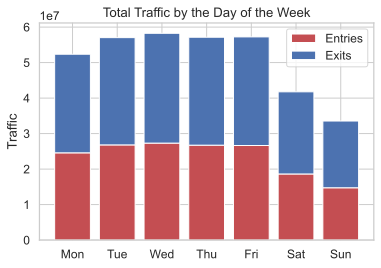

In [28]:
# Plotting the weekday total traffic:

fig, ax = plt.subplots()

ax.bar((0,1,2,3,4,5,6), weekdays_total['ENTRIES_DIFF'], color='r')
ax.bar((0,1,2,3,4,5,6), weekdays_total['EXITS_DIFF'], bottom=weekdays_total['ENTRIES_DIFF'], color='b')

ax.set_ylabel('Traffic')
ax.set_title('Total Traffic by the Day of the Week')
ax.legend(labels=['Entries', 'Exits'])
plt.xticks((0,1,2,3,4,5,6), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.show()
fig.savefig("Total_daily.png", bbox_inches='tight', dpi=600)

### At this point we load the resampled data frame from previous notebook in order to analyze the top 7 stations further:

In [29]:
mta_resampled_df = pd.read_csv('mta_resampled_df.csv')

In [30]:
mta_resampled_df.describe()

,Unnamed: 0,ENTRIES_DIFF,EXITS_DIFF
count,2.731541e+06,2.592311e+06,2.585912e+06
mean,1.365770e+06,6.546652e+01,7.198387e+01
std,7.885281e+05,1.313063e+02,1.129643e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.828850e+05,4.250000e+00,7.750000e+00
50%,1.365770e+06,2.825000e+01,3.300000e+01
75%,2.048655e+06,8.550000e+01,9.200000e+01
max,2.731540e+06,4.786166e+03,4.171500e+03


In [31]:
mta_resampled_df.head()

,Unnamed: 0,TURNSTILE,STATION,DATE_TIME,ENTRIES_DIFF,EXITS_DIFF
0,0,A002/R051/02-00-00,59 ST,2021-06-05 00:00:00,0.0,0.0
1,1,A002/R051/02-00-00,59 ST,2021-06-05 04:00:00,9.0,1.0
2,2,A002/R051/02-00-00,59 ST,2021-06-05 08:00:00,4.0,10.0
3,3,A002/R051/02-00-00,59 ST,2021-06-05 12:00:00,55.0,20.0
4,4,A002/R051/02-00-00,59 ST,2021-06-05 16:00:00,115.0,28.0


In [32]:
# Removal of the old index column:

mta_resampled_df.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
# Assigning date, time and day of the week values to the df:

mta_resampled_df['DATE'] = pd.to_datetime(mta_resampled_df['DATE_TIME']).dt.date
mta_resampled_df['TIME'] = pd.to_datetime(mta_resampled_df['DATE_TIME']).dt.time
mta_resampled_df['DAY_OF_WEEK'] = pd.to_datetime(mta_resampled_df['DATE_TIME']).dt.day_name()

In [34]:
mta_resampled_df.head()

,TURNSTILE,STATION,DATE_TIME,ENTRIES_DIFF,EXITS_DIFF,DATE,TIME,DAY_OF_WEEK
0,A002/R051/02-00-00,59 ST,2021-06-05 00:00:00,0.0,0.0,2021-06-05,00:00:00,Saturday
1,A002/R051/02-00-00,59 ST,2021-06-05 04:00:00,9.0,1.0,2021-06-05,04:00:00,Saturday
2,A002/R051/02-00-00,59 ST,2021-06-05 08:00:00,4.0,10.0,2021-06-05,08:00:00,Saturday
3,A002/R051/02-00-00,59 ST,2021-06-05 12:00:00,55.0,20.0,2021-06-05,12:00:00,Saturday
4,A002/R051/02-00-00,59 ST,2021-06-05 16:00:00,115.0,28.0,2021-06-05,16:00:00,Saturday


In [35]:
# Assigning a weekday number to each day in the totals df:

weekday_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
lst_1 =[]

for day in mta_resampled_df['DAY_OF_WEEK']:
    lst_1.append(weekday_dict[day])

In [36]:
mta_resampled_df['NUM_OF_DAY'] = lst_1
mta_resampled_df.head()

,TURNSTILE,STATION,DATE_TIME,ENTRIES_DIFF,EXITS_DIFF,DATE,TIME,DAY_OF_WEEK,NUM_OF_DAY
0,A002/R051/02-00-00,59 ST,2021-06-05 00:00:00,0.0,0.0,2021-06-05,00:00:00,Saturday,5
1,A002/R051/02-00-00,59 ST,2021-06-05 04:00:00,9.0,1.0,2021-06-05,04:00:00,Saturday,5
2,A002/R051/02-00-00,59 ST,2021-06-05 08:00:00,4.0,10.0,2021-06-05,08:00:00,Saturday,5
3,A002/R051/02-00-00,59 ST,2021-06-05 12:00:00,55.0,20.0,2021-06-05,12:00:00,Saturday,5
4,A002/R051/02-00-00,59 ST,2021-06-05 16:00:00,115.0,28.0,2021-06-05,16:00:00,Saturday,5


In [37]:
mta_df_clean.head()

,TURNSTILE,STATION,DATE_TIME,DATE,TIME,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,T_INTERVAL,ENTRIES_RATE,EXITS_RATE
0,A002/R051/02-00-00,59 ST,2021-06-05 00:00:00,06/05/2021,00:00:00,7581941,2591624,0.0,0.0,NaN,NaN,NaN
1,A002/R051/02-00-00,59 ST,2021-06-05 04:00:00,06/05/2021,04:00:00,7581950,2591625,9.0,1.0,14400.0,0.000625,0.000069
2,A002/R051/02-00-00,59 ST,2021-06-05 08:00:00,06/05/2021,08:00:00,7581954,2591635,4.0,10.0,14400.0,0.000278,0.000694
3,A002/R051/02-00-00,59 ST,2021-06-05 12:00:00,06/05/2021,12:00:00,7582009,2591655,55.0,20.0,14400.0,0.003819,0.001389
4,A002/R051/02-00-00,59 ST,2021-06-05 16:00:00,06/05/2021,16:00:00,7582124,2591683,115.0,28.0,14400.0,0.007986,0.001944


### And now we draw heat map plots to track the patterns of change in traffic during 6 time slots per each weekday for both the entries and exits of top 7 stations: 

## 34 ST-PENN STATION

In [38]:
# Calculating the total traffic for each station in each 4 hour recording (and resampling) window:

mta_34_penn = mta_resampled_df[mta_resampled_df['STATION'] == '34 ST-PENN STA'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()


In [39]:
mta_34_penn.head()

,DATE,TIME,DAY_OF_WEEK,NUM_OF_DAY,ENTRIES_DIFF,EXITS_DIFF
0,2021-06-05,00:00:00,Saturday,5,0.000000,0.000000
1,2021-06-05,04:00:00,Saturday,5,740.500000,1127.500000
2,2021-06-05,08:00:00,Saturday,5,1719.500000,3318.000000
3,2021-06-05,12:00:00,Saturday,5,5749.000000,9926.000000
4,2021-06-05,16:00:00,Saturday,5,9097.009901,13499.410891


In [40]:
# Calculating the median traffic in each 4 hour time slot during each weakday:

mta_34_penn_medians = mta_34_penn.groupby(['DAY_OF_WEEK'
                                           , 'NUM_OF_DAY'
                                           , 'TIME'])[['ENTRIES_DIFF'
                                                       , 'EXITS_DIFF']].median().reset_index()

In [41]:
mta_34_penn_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,5326.081689,6994.619203
1,Friday,4,04:00:00,1194.009901,1583.119203
2,Friday,4,08:00:00,6627.500000,6859.268456
3,Friday,4,12:00:00,9986.500000,13129.768456
4,Friday,4,16:00:00,11306.081689,19058.410891
5,Friday,4,20:00:00,13079.081689,20870.910891
6,Monday,0,00:00:00,5060.700000,5348.619203
7,Monday,0,04:00:00,1005.036913,1221.000000
8,Monday,0,08:00:00,7860.009901,7048.500000
9,Monday,0,12:00:00,11523.009901,12568.768456


### And now we plot the medians:

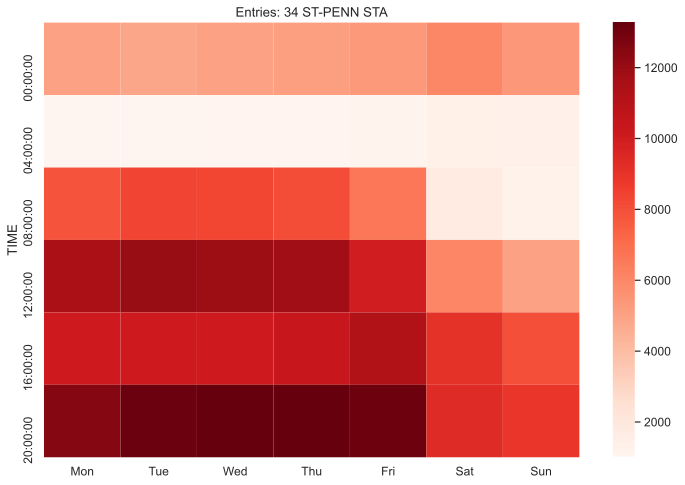

In [42]:
station_of_interest = '34 ST-PENN STA'
draw_station = mta_34_penn_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("34 ST-PENN STA-Entries.png", bbox_inches='tight', dpi=600)

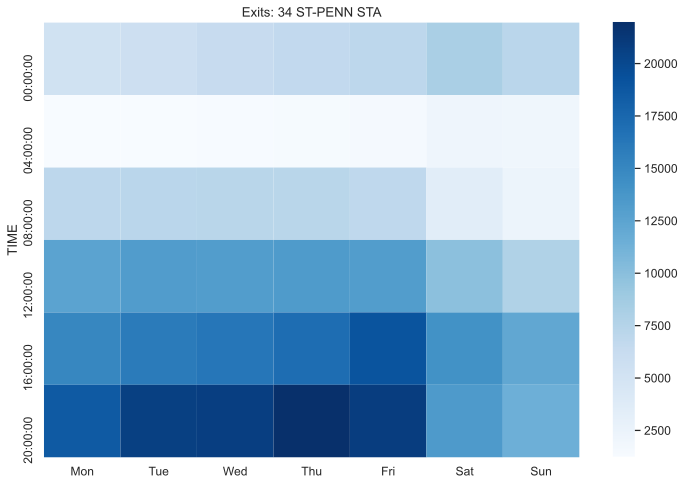

In [43]:
station_of_interest = '34 ST-PENN STA'
draw_station = mta_34_penn_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("34 ST-PENN STA-Exits.png", bbox_inches='tight', dpi=600)

## 34 ST-HERALD SQ

In [44]:
mta_34_herald = mta_resampled_df[mta_resampled_df['STATION'] == '34 ST-HERALD SQ'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [45]:
mta_34_herald_medians = mta_34_herald.groupby(['DAY_OF_WEEK'
                                               , 'NUM_OF_DAY'
                                               , 'TIME'])[['ENTRIES_DIFF'
                                                         , 'EXITS_DIFF']].median().reset_index()

In [46]:
mta_34_herald_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,5379.0,4224.0
1,Friday,4,04:00:00,772.0,655.0
2,Friday,4,08:00:00,2157.0,5245.0
3,Friday,4,12:00:00,5564.0,12822.0
4,Friday,4,16:00:00,9961.0,13393.0
5,Friday,4,20:00:00,14419.0,15139.0
6,Monday,0,00:00:00,3808.0,3333.0
7,Monday,0,04:00:00,483.0,531.0
8,Monday,0,08:00:00,2401.0,5393.0
9,Monday,0,12:00:00,5734.0,13834.0


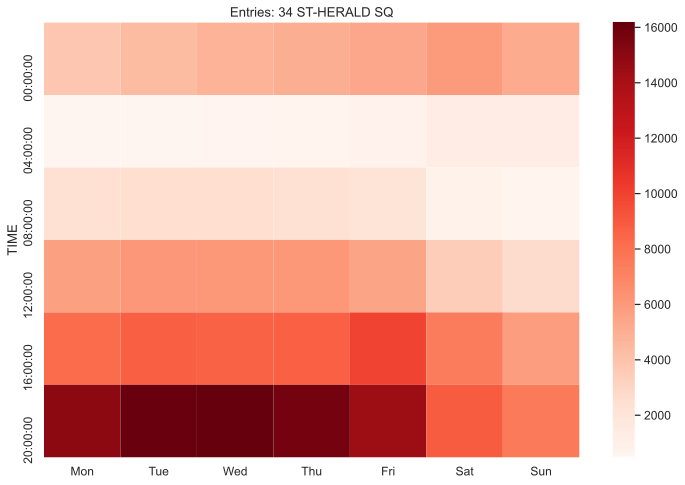

In [47]:
station_of_interest = '34 ST-HERALD SQ'
draw_station = mta_34_herald_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("34 ST-HERALD SQ-Entries.png", bbox_inches='tight', dpi=600)

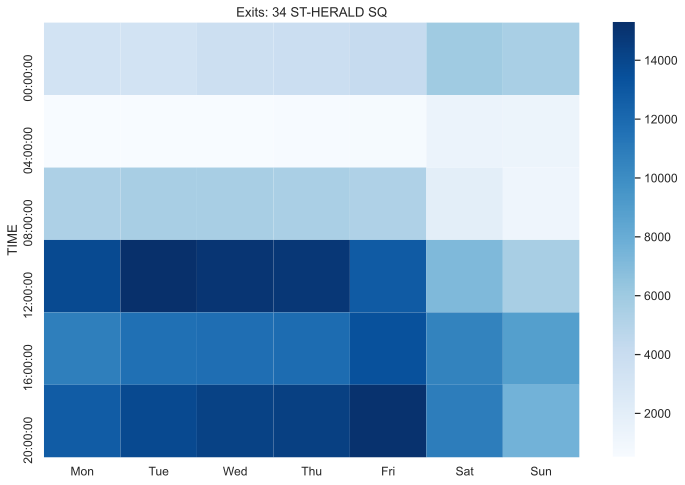

In [48]:
station_of_interest = '34 ST-HERALD SQ'
draw_station = mta_34_herald_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("34 ST-HERALD SQ-Exits.png", bbox_inches='tight', dpi=600)

## 42-ST GRAND CTRL

In [49]:
mta_42_grd_cntrl = mta_resampled_df[mta_resampled_df['STATION'] == 'GRD CNTRL-42 ST'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [50]:
mta_42_grd_cntrl_medians = mta_42_grd_cntrl.groupby(['DAY_OF_WEEK'
                                               , 'NUM_OF_DAY'
                                               , 'TIME'])[['ENTRIES_DIFF'
                                                         , 'EXITS_DIFF']].median().reset_index()

In [51]:
mta_42_grd_cntrl_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,4724.75,4015.875
1,Friday,4,04:00:00,809.50,891.750
2,Friday,4,08:00:00,2719.00,8613.750
3,Friday,4,12:00:00,5806.25,12714.250
4,Friday,4,16:00:00,9540.75,12429.750
5,Friday,4,20:00:00,11588.75,11382.000
6,Monday,0,00:00:00,2566.00,3162.250
7,Monday,0,04:00:00,375.25,698.000
8,Monday,0,08:00:00,3191.75,9806.250
9,Monday,0,12:00:00,6557.00,13693.750


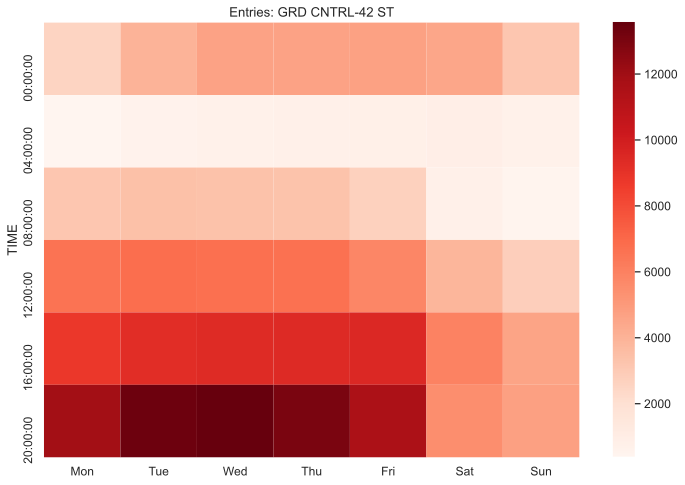

In [52]:
station_of_interest = 'GRD CNTRL-42 ST'
draw_station = mta_42_grd_cntrl_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("GRD CNTRL-42 ST-Entries.png", bbox_inches='tight', dpi=600)

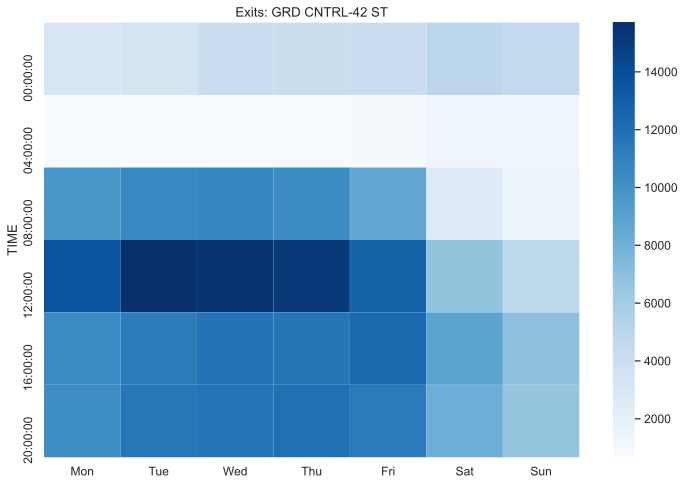

In [53]:
station_of_interest = 'GRD CNTRL-42 ST'
draw_station = mta_42_grd_cntrl_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("GRD CNTRL-42 ST-Exits.png", bbox_inches='tight', dpi=600)

## 42-ST PORT AUTHORITY

In [54]:
mta_42_pa = mta_resampled_df[mta_resampled_df['STATION'] == '42 ST-PORT AUTH'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [55]:
mta_42_pa_medians = mta_42_pa.groupby(['DAY_OF_WEEK'
                                     , 'NUM_OF_DAY'
                                     , 'TIME'])[['ENTRIES_DIFF'
                                               , 'EXITS_DIFF']].median().reset_index()

In [56]:
mta_42_pa_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,3699.5,5579.5
1,Friday,4,04:00:00,980.0,1248.5
2,Friday,4,08:00:00,6871.0,3748.0
3,Friday,4,12:00:00,7417.5,6818.0
4,Friday,4,16:00:00,6406.0,10220.5
5,Friday,4,20:00:00,7958.0,13969.0
6,Monday,0,00:00:00,3699.0,4581.5
7,Monday,0,04:00:00,861.0,980.0
8,Monday,0,08:00:00,7438.5,3849.0
9,Monday,0,12:00:00,7855.5,6592.0


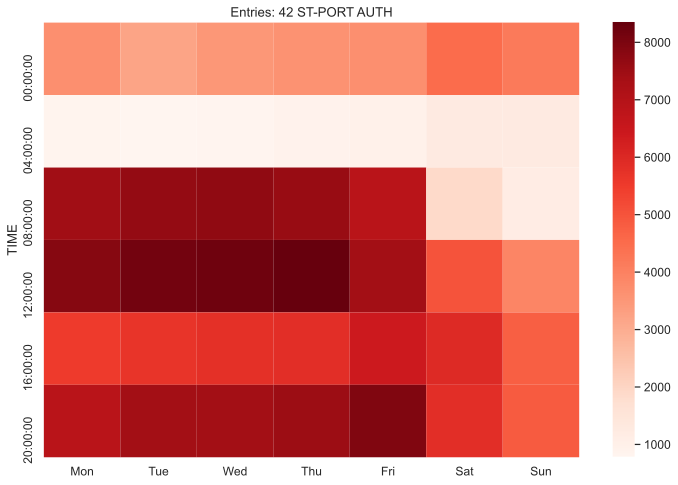

In [57]:
station_of_interest = '42 ST-PORT AUTH'
draw_station = mta_42_pa_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("42 ST-PORT AUTH-Entries.png", bbox_inches='tight', dpi=600)

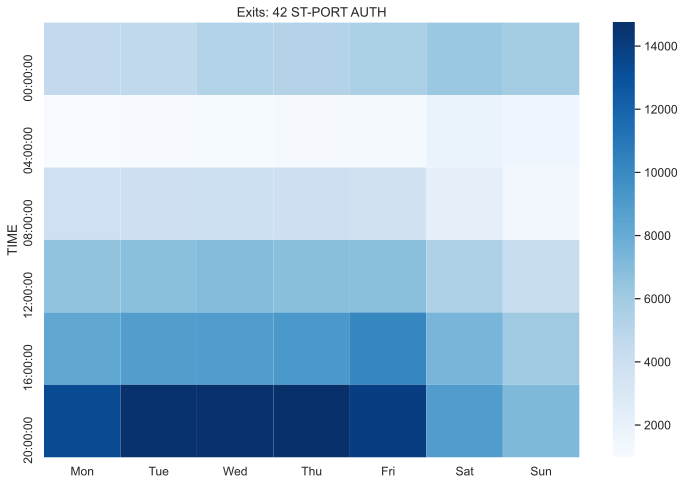

In [58]:
station_of_interest = '42 ST-PORT AUTH'
draw_station = mta_42_pa_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("42 ST-PORT AUTH-Exits.png", bbox_inches='tight', dpi=600)

## 14-ST UNION SQ

In [59]:
mta_14_union = mta_resampled_df[mta_resampled_df['STATION'] == '14 ST-UNION SQ'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [60]:
mta_14_union_medians = mta_14_union.groupby(['DAY_OF_WEEK'
                                     , 'NUM_OF_DAY'
                                     , 'TIME'])[['ENTRIES_DIFF'
                                               , 'EXITS_DIFF']].median().reset_index()

In [61]:
mta_14_union_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,5676.75,4253.00
1,Friday,4,04:00:00,1304.75,917.00
2,Friday,4,08:00:00,1482.75,5789.25
3,Friday,4,12:00:00,3798.00,9694.75
4,Friday,4,16:00:00,8691.50,11647.25
5,Friday,4,20:00:00,9762.00,10730.00
6,Monday,0,00:00:00,3468.00,3103.25
7,Monday,0,04:00:00,848.25,737.25
8,Monday,0,08:00:00,1537.00,6112.00
9,Monday,0,12:00:00,3456.25,9343.50


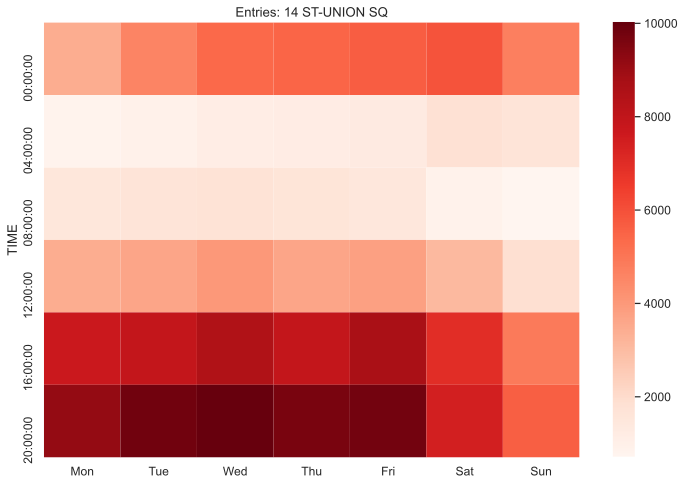

In [62]:
station_of_interest = '14 ST-UNION SQ'
draw_station = mta_14_union_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("14 ST-UNION SQ-Entries.png", bbox_inches='tight', dpi=600)

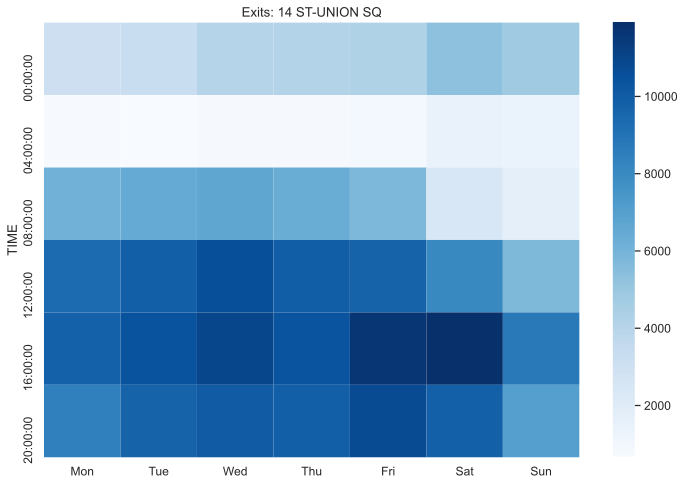

In [63]:
station_of_interest = '14 ST-UNION SQ'
draw_station = mta_14_union_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("14 ST-UNION SQ-Exits.png", bbox_inches='tight', dpi=600)

## TIMES SQ-42 ST

In [64]:
mta_42_times = mta_resampled_df[mta_resampled_df['STATION'] == 'TIMES SQ-42 ST'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [65]:
mta_42_times_medians = mta_42_times.groupby(['DAY_OF_WEEK'
                                     , 'NUM_OF_DAY'
                                     , 'TIME'])[['ENTRIES_DIFF'
                                               , 'EXITS_DIFF']].median().reset_index()

In [66]:
mta_42_times_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,4939.0,4272.0
1,Friday,4,04:00:00,946.0,763.0
2,Friday,4,08:00:00,1850.0,3644.0
3,Friday,4,12:00:00,4148.0,8947.0
4,Friday,4,16:00:00,6459.0,8918.0
5,Friday,4,20:00:00,8959.0,10001.0
6,Monday,0,00:00:00,3992.0,4328.0
7,Monday,0,04:00:00,780.0,633.0
8,Monday,0,08:00:00,1943.0,3850.0
9,Monday,0,12:00:00,3843.0,10045.0


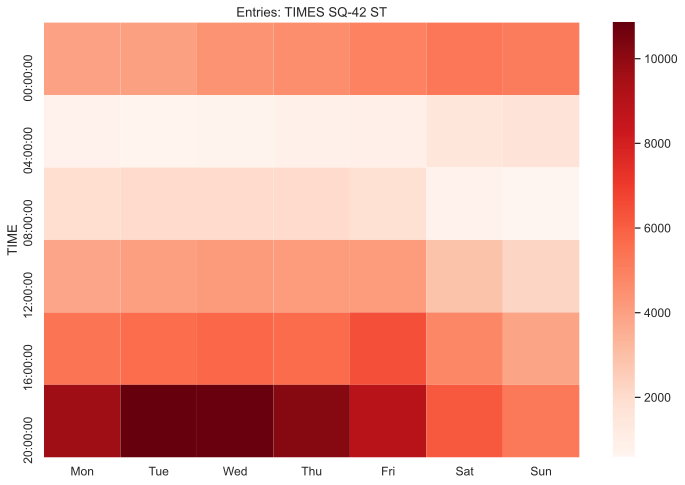

In [67]:
station_of_interest = 'TIMES SQ-42 ST'
draw_station = mta_42_times_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("TIMES SQ-42 ST-Entries.png", bbox_inches='tight', dpi=600)

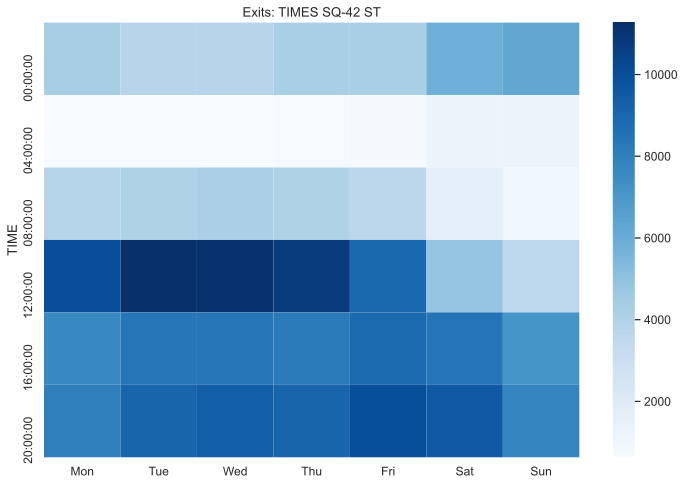

In [68]:
station_of_interest = 'TIMES SQ-42 ST'
draw_station = mta_42_times_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("TIMES SQ-42 ST-Exits.png", bbox_inches='tight', dpi=600)

## FULTON ST	

In [69]:
mta_fulton = mta_resampled_df[mta_resampled_df['STATION'] == 'FULTON ST'].groupby(['DATE'
                                                                             , 'TIME'
                                                                             , 'DAY_OF_WEEK'
                                                                             , 'NUM_OF_DAY'])[['ENTRIES_DIFF'
                                                                                               ,'EXITS_DIFF']].sum().reset_index()

In [70]:
mta_fulton_medians = mta_fulton.groupby(['DAY_OF_WEEK'
                                     , 'NUM_OF_DAY'
                                     , 'TIME'])[['ENTRIES_DIFF'
                                               , 'EXITS_DIFF']].median().reset_index()

In [71]:
mta_fulton_medians.head(10)

,DAY_OF_WEEK,NUM_OF_DAY,TIME,ENTRIES_DIFF,EXITS_DIFF
0,Friday,4,00:00:00,3863.50,3702.25
1,Friday,4,04:00:00,759.75,1048.50
2,Friday,4,08:00:00,2525.75,4839.50
3,Friday,4,12:00:00,3947.50,8165.50
4,Friday,4,16:00:00,6928.50,8264.00
5,Friday,4,20:00:00,8373.00,8353.50
6,Monday,0,00:00:00,2033.50,2582.50
7,Monday,0,04:00:00,495.50,870.50
8,Monday,0,08:00:00,2760.25,5439.75
9,Monday,0,12:00:00,3937.25,8604.00


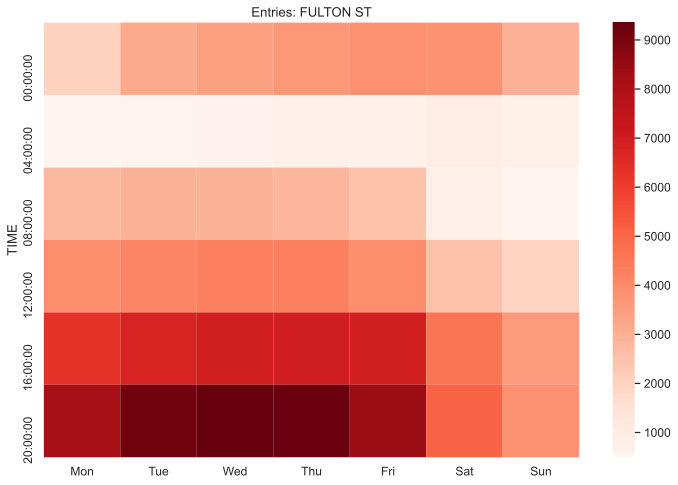

In [72]:
station_of_interest = 'FULTON ST'
draw_station = mta_fulton_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).ENTRIES_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Reds')
plt.show()
fig.savefig("FULTON ST-Entries.png", bbox_inches='tight', dpi=600)

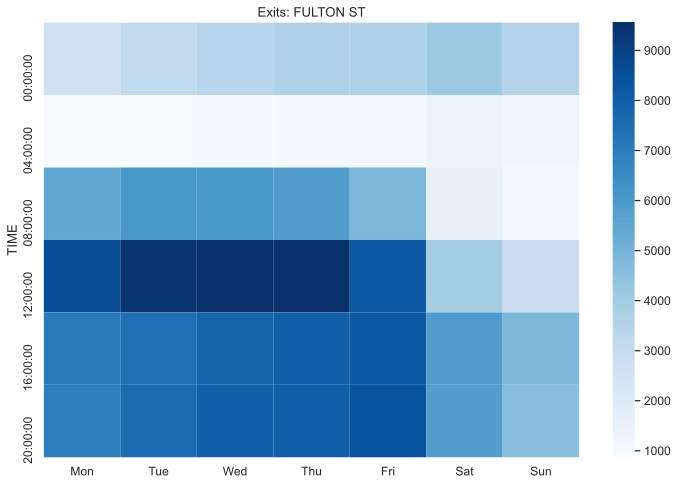

In [73]:
station_of_interest = 'FULTON ST'
draw_station = mta_fulton_medians

station_heatmap = draw_station.set_index(['NUM_OF_DAY', 'TIME']).EXITS_DIFF.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()
fig.savefig("FULTON ST-Exits.png", bbox_inches='tight', dpi=600)